X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_15 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 512)       

2023-03-19 08:29:32.963645: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - ETA: 0s - loss: 1.8203 - accuracy: 0.3658

2023-03-19 08:29:39.356154: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 8s 22ms/step - loss: 1.8203 - accuracy: 0.3658 - val_loss: 1.4673 - val_accuracy: 0.4784
Epoch 2/20
313/313 [==============================] - 6s 20ms/step - loss: 1.3871 - accuracy: 0.5100 - val_loss: 1.3764 - val_accuracy: 0.5236
Epoch 3/20
313/313 [==============================] - 6s 20ms/step - loss: 1.2496 - accuracy: 0.5563 - val_loss: 1.2206 - val_accuracy: 0.5749
Epoch 4/20
313/313 [==============================] - 6s 20ms/step - loss: 1.1552 - accuracy: 0.5915 - val_loss: 1.2106 - val_accuracy: 0.5779
Epoch 5/20
313/313 [==============================] - 6s 20ms/step - loss: 1.0911 - accuracy: 0.6172 - val_loss: 1.0816 - val_accuracy: 0.6269
Epoch 6/20
313/313 [==============================] - 6s 20ms/step - loss: 1.0258 - accuracy: 0.6379 - val_loss: 1.1292 - val_accuracy: 0.6100
Epoch 7/20
313/313 [==============================] - 6s 20ms/step - loss: 0.9828 - accuracy: 0.6529 - val_loss: 1.0751 - val_accuracy: 0.6295
Epoch 8/20

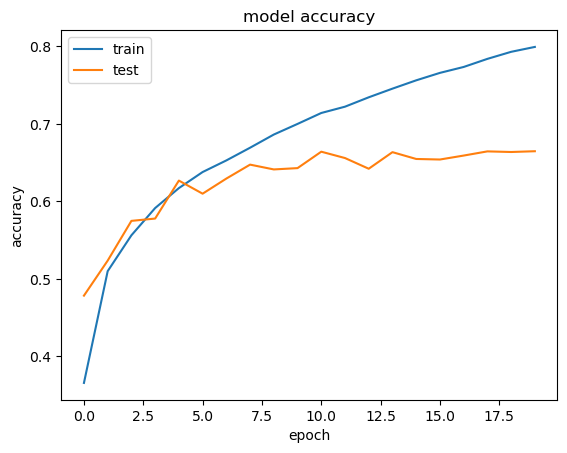

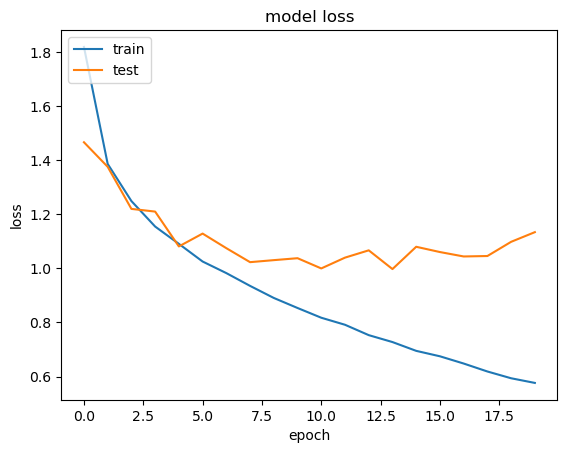

In [4]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

# constant
BATCH_SIZE = 128
NB_EPOCH = 20
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

# load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

# train
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
history = model.fit(X_train,
                    Y_train,
                    batch_size=BATCH_SIZE,
                    epochs=NB_EPOCH,
                    validation_split=VALIDATION_SPLIT,
                    verbose=VERBOSE)
score = model.evaluate(X_test, Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

#save model
model_json = model.to_json()
open('cifar10_architecture_model.json', 'w').write(model_json)
#save weights
model.save_weights('cifar10_weights.h5', overwrite=True)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_3 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_4 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 32)

2023-03-19 08:23:19.750888: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - ETA: 0s - loss: 1.9611 - accuracy: 0.2704

2023-03-19 08:23:27.783855: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 9s 27ms/step - loss: 1.9611 - accuracy: 0.2704 - val_loss: 1.6768 - val_accuracy: 0.3830
Epoch 2/20
313/313 [==============================] - 8s 24ms/step - loss: 1.6262 - accuracy: 0.4037 - val_loss: 1.6285 - val_accuracy: 0.4137
Epoch 3/20
313/313 [==============================] - 8s 24ms/step - loss: 1.4524 - accuracy: 0.4738 - val_loss: 1.3243 - val_accuracy: 0.5196
Epoch 4/20
313/313 [==============================] - 8s 24ms/step - loss: 1.3281 - accuracy: 0.5227 - val_loss: 1.3482 - val_accuracy: 0.5231
Epoch 5/20
313/313 [==============================] - 8s 24ms/step - loss: 1.2345 - accuracy: 0.5581 - val_loss: 1.1523 - val_accuracy: 0.5904
Epoch 6/20
313/313 [==============================] - 8s 24ms/step - loss: 1.1721 - accuracy: 0.5817 - val_loss: 1.0915 - val_accuracy: 0.6182
Epoch 7/20
313/313 [==============================] - 8s 25ms/step - loss: 1.1150 - accuracy: 0.6070 - val_loss: 1.0233 - val_accuracy: 0.6391
Epoch 8/20

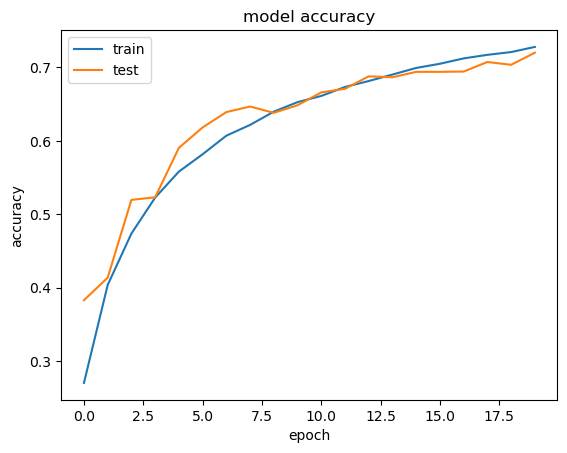

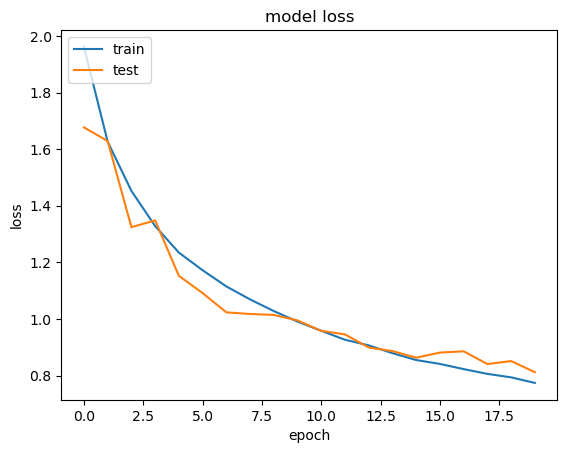

In [2]:
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

# constant
BATCH_SIZE = 128
NB_EPOCH = 20
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

# load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

# train
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
history = model.fit(X_train,
                    Y_train,
                    batch_size=BATCH_SIZE,
                    epochs=NB_EPOCH,
                    validation_split=VALIDATION_SPLIT,
                    verbose=VERBOSE)
score = model.evaluate(X_test, Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

#save model
model_json = model.to_json()
open('cifar10_architecture_model.json', 'w').write(model_json)
#save weights
model.save_weights('cifar10_weights.h5', overwrite=True)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Augmenting training set images...
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_9 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_10 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (D

2023-03-19 08:25:57.307687: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - ETA: 0s - loss: 1.9354 - accuracy: 0.2847

2023-03-19 08:26:05.634386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 10s 29ms/step - loss: 1.9354 - accuracy: 0.2847 - val_loss: 1.6642 - val_accuracy: 0.3836
Epoch 2/20
313/313 [==============================] - 9s 27ms/step - loss: 1.6173 - accuracy: 0.4079 - val_loss: 1.4144 - val_accuracy: 0.4775
Epoch 3/20
313/313 [==============================] - 8s 25ms/step - loss: 1.4515 - accuracy: 0.4718 - val_loss: 1.5033 - val_accuracy: 0.4731
Epoch 4/20
313/313 [==============================] - 8s 25ms/step - loss: 1.3447 - accuracy: 0.5151 - val_loss: 1.3570 - val_accuracy: 0.5215
Epoch 5/20
313/313 [==============================] - 8s 25ms/step - loss: 1.2555 - accuracy: 0.5499 - val_loss: 1.3360 - val_accuracy: 0.5240
Epoch 6/20
313/313 [==============================] - 8s 25ms/step - loss: 1.1842 - accuracy: 0.5797 - val_loss: 1.2056 - val_accuracy: 0.5744
Epoch 7/20
313/313 [==============================] - 8s 25ms/step - loss: 1.1295 - accuracy: 0.5983 - val_loss: 1.1034 - val_accuracy: 0.6015
Epoch 8/2

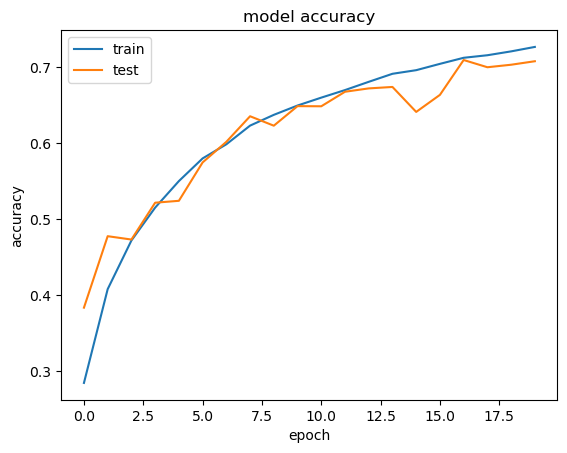

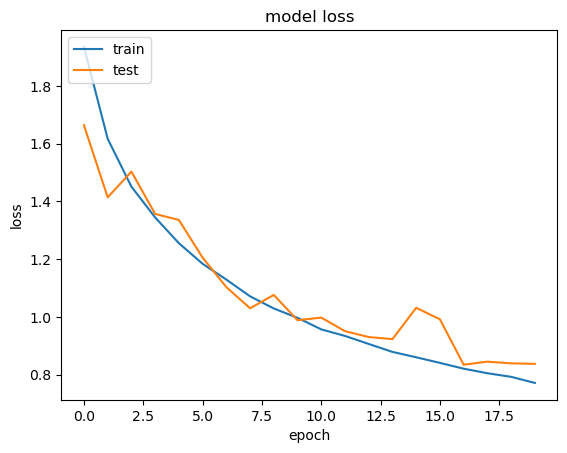

In [3]:
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

# constant
BATCH_SIZE = 128
NB_EPOCH = 20
NB_CLASSES = 10
NUM_TO_AUGMENT = 5
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

# load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# augmenting
print("Augmenting training set images...")
datagen = ImageDataGenerator( rotation_range=40,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')
xtas, ytas = [], []
for i in range (X_train.shape[0]):
    num_aug = 0
    x = X_train[i] # (3, 32, 32)
    x = x.reshape((1,) + x.shape) # (1, 3, 32, 32)
for x_aug in datagen.flow(x, batch_size = 32,
                         save_to_dir='preview',
                         save_prefix='cifar',
                         save_format='jpeg'):
    if num_aug >= NUM_TO_AUGMENT:
        num_aug = 0
        break
    else:
        num_aug += 1

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

#fit the dataget
datagen.fit(X_train)

# train
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
history = model.fit(X_train,
                    Y_train,
                    batch_size=BATCH_SIZE,
                    epochs=NB_EPOCH,
                    validation_split=VALIDATION_SPLIT,
                    verbose=VERBOSE)
score = model.evaluate(X_test, Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

#save model
model_json = model.to_json()
open('cifar10_architecture_model.json', 'w').write(model_json)
#save weights
model.save_weights('cifar10_weights.h5', overwrite=True)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# Image Recognition Ethical and Privacy Analysis

When it comes to the use of neural networks with image recognition, there are some pressing privacy and ethical concerns to think about.  One specific technology that comes to mind are automated license plate readers (ALPRs) and their use by law enforcement or other government agencies.

The ALPR system consists of either a mobile or stationary camera that "automatically capture all license plate numbers that come into view, along with the location, date, and time.  The data, which includes photographs of the vehicle and sometimes its driver and passengers, is then uploaded to a central server." (Automated License Plate Readers (ALPRs), 2020)  This presents a significant privacy concern as stated in an article from the Electronic Frontier Foundation (EFF),

>Taken in the aggregate, ALPR data can paint an intimate portrait of a driver’s life and even chill First Amendment protected activity. ALPR technology can be used to target drivers who visit sensitive places such as health centers, immigration clinics, gun shops, union halls, protests, or centers of religious worship.
>
>Drivers have no control over whether their vehicle displays a license plate because the government requires all car, truck, and motorcycle drivers to display license plates in public view. So it’s particularly disturbing that automatic license plate readers are used to track and record the movements of millions of ordinary people, even though the overwhelming majority are not connected to a crime. (Automated License Plate Readers (ALPRs), 2020)

Additional threats come from law enforcements demonstrated history of abuse with technology across the country.  For example, "police officers in New York drove down a street and electronically recorded the license plate numbers of everyone parked near a mosque."  Another example comes from looking into police records of the Oakland Police Department that "showed that police disproportionately deploy ALPR-mounted vehicles in low-income communities and communities of color." (Automated License Plate Readers (ALPRs), 2020)

Alongside issues concerning the abuse of this technology, there are also issues with accuracy of the technology as well.  Accuracy is critical because of the high stakes involved in getting it wrong.  From the same article from the EFF,

>In 2009, San Francisco police pulled over Denise Green, an African-American city worker, handcuffed her at gunpoint, forced her to her knees, and searched both her and her vehicle—all because her car was misidentified as stolen due to a license plate reader error. Her experience led the U.S. Ninth Circuit Court of Appeals to rule that technology alone can’t be the basis of such a stop, but that judgment does not apply everywhere, leaving people vulnerable to similar law enforcement errors. (Automated License Plate Readers (ALPRs), 2020)

The tracking of any and all individuals that unfortunately end up in the path of one of these scanners is a gross violation of privacy and unacceptable.  Whatever claimed good is achieved with this image recognition technology does not compare to the violation of an individuals right to privacy.

## References

- Automated License Plate Readers (ALPRs). (2020, May 15). Electronic Frontier Foundation. https://www.eff.org/pages/automated-license-plate-readers-alpr
